In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use("seaborn")
import prince

C:\Users\ASUS\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data

In [2]:
sa= pd.read_csv("../Datasets/sa_2021_desc.csv")
sa_a= pd.read_csv("../Datasets/sa_2021_access.csv")
sa_u= pd.read_csv("../Datasets/sa_2021_usage.csv")

eca= pd.read_csv('../Datasets/eca_2021_desc.csv')
eca_a= pd.read_csv('../Datasets/eca_2021_access.csv')
eca_u= pd.read_csv('../Datasets/eca_2021_usage.csv')

mena= pd.read_csv("../Datasets/mena_2021_desc.csv")
mena_a= pd.read_csv("../Datasets/mena_2021_access.csv")
mena_u= pd.read_csv("../Datasets/mena_2021_usage.csv")

lac= pd.read_csv('../Datasets/lac_2021_desc.csv')
lac_a= pd.read_csv('../Datasets/lac_2021_access.csv')
lac_u= pd.read_csv('../Datasets/lac_2021_usage.csv')

hi= pd.read_csv("../Datasets/hi_2021_desc.csv")
hi_a= pd.read_csv("../Datasets/hi_2021_access.csv")
hi_u= pd.read_csv("../Datasets/hi_2021_usage.csv")

ssa= pd.read_csv('../Datasets/ssa_2021_desc.csv')
ssa_a= pd.read_csv('../Datasets/ssa_2021_access.csv')
ssa_u= pd.read_csv('../Datasets/ssa_2021_usage.csv')

eap= pd.read_csv("../Datasets/eap_2021_desc.csv")
eap_a= pd.read_csv("../Datasets/eap_2021_access.csv")
eap_u= pd.read_csv("../Datasets/eap_2021_usage.csv")

In [3]:
ctry= [sa, eca, mena, lac, hi, ssa, eap]
ctry_a= [sa_a, eca_a, mena_a, lac_a, hi_a, ssa_a, eap_a]
ctry_u= [sa_u, eca_u, mena_u, lac_u, hi_u, ssa_u, eap_u]
ctry_name= ['South Asia', 'Europe & Central Asia', 'Middle East & North Africa', 'Latin America & Caribbean', 
            'High income', 'Sub-Saharan Africa', 'East Asia & Pacific']
df= pd.concat(ctry, axis=0)
df_a= pd.concat(ctry_a, axis=0)
df_u= pd.concat(ctry_u, axis=0)

In [4]:
df_u= pd.concat([df_u, df["regionwb"]], axis=1)
df_u

,wgt,female,age,educ,inc_q,fin4,fin5,fin8,fin9,fin10,...,fin31b,fin32,fin37,fin38,saved,borrowed,anydigpayment,merchantpay_dig,fin34a,regionwb
0,0.774286,1,1.0,2,4,NaN,NaN,NaN,NaN,NaN,...,NaN,No,2,No,2,2,2,2.0,0,South Asia
1,0.766367,1,3.0,1,5,NaN,NaN,NaN,NaN,NaN,...,NaN,No,2,No,2,1,2,2.0,0,South Asia
2,0.588983,1,2.0,1,1,NaN,NaN,NaN,NaN,NaN,...,NaN,No,2,No,2,1,2,2.0,0,South Asia
3,2.572345,1,3.0,1,4,NaN,NaN,NaN,NaN,NaN,...,NaN,No,2,No,2,1,2,2.0,0,South Asia
4,0.525471,2,2.0,3,1,NaN,No,NaN,No,No,...,NaN,Yes,2,No,2,1,1,2.0,1,South Asia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11574,1.472721,1,6.0,3,3,NaN,NaN,NaN,NaN,NaN,...,No,No,1,No,2,2,1,2.0,0,East Asia & Pacific (excluding high income)
11575,0.157863,2,4.0,3,5,No,Yes,Yes,Yes,Yes,...,Yes,Yes,1,No,1,1,1,1.0,1,East Asia & Pacific (excluding high income)
11576,0.989320,2,3.0,3,5,No,Yes,Yes,Yes,Yes,...,Yes,Yes,1,No,1,1,1,1.0,1,East Asia & Pacific (excluding high income)
11577,0.138057,1,3.0,3,5,Yes,Yes,Yes,Yes,Yes,...,Yes,Yes,1,No,1,1,1,1.0,1,East Asia & Pacific (excluding high income)


## Gender

In [6]:
df.loc[df["regionwb"]== "Europe & Central Asia (excluding high income)", "regionwb"]= "Europe & Central Asia"
df.loc[df["regionwb"]== "Middle East & North Africa (excluding high income)", "regionwb"]= "Middle East & North Africa"
df.loc[df["regionwb"]== "Latin America & Caribbean (excluding high income)", "regionwb"]= "Latin America & Caribbean"
df.loc[df["regionwb"]== "Sub-Saharan Africa (excluding high income)", "regionwb"]= "Sub-Saharan Africa"
df.loc[df["regionwb"]== "East Asia & Pacific (excluding high income)", "regionwb"]= "East Asia & Pacific"

df_u.loc[df_u["regionwb"]== "Europe & Central Asia (excluding high income)", "regionwb"]= "Europe & Central Asia"
df_u.loc[df_u["regionwb"]== "Middle East & North Africa (excluding high income)", "regionwb"]= "Middle East & North Africa"
df_u.loc[df_u["regionwb"]== "Latin America & Caribbean (excluding high income)", "regionwb"]= "Latin America & Caribbean"
df_u.loc[df_u["regionwb"]== "Sub-Saharan Africa (excluding high income)", "regionwb"]= "Sub-Saharan Africa"
df_u.loc[df_u["regionwb"]== "East Asia & Pacific (excluding high income)", "regionwb"]= "East Asia & Pacific"

In [7]:
counts = df.groupby(['regionwb', 'fin34a', 'female']).size().reset_index(name='count')
total_counts = counts.groupby(['regionwb', 'fin34a'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
counts= counts[counts["fin34a"]== 1]
pivot_table = counts.pivot(index=['regionwb'], columns='female', 
                           values='percentage')

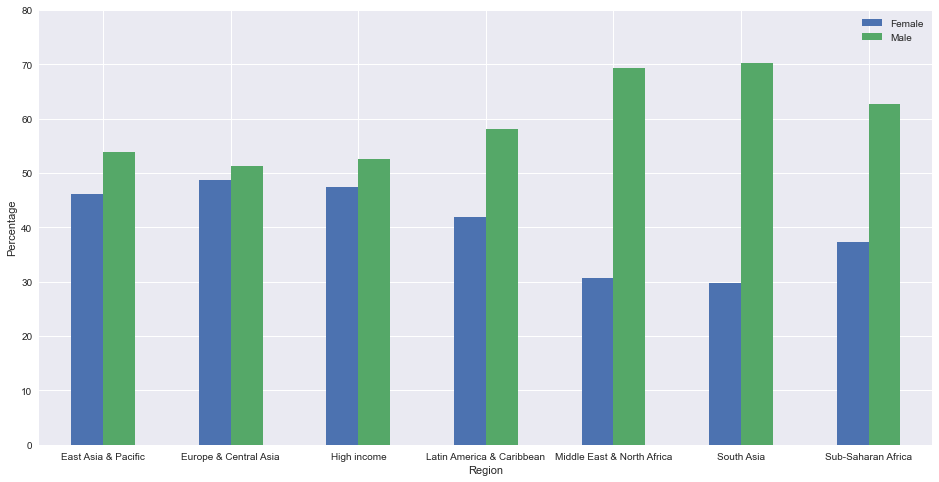

In [8]:
#colors = ['#800000', '#008000']
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Region')
plt.ylabel('Percentage')
legend_labels = ['Female', 'Male']
ax.legend(legend_labels)
plt.ylim([0, 80])

custom_ticks= list(counts["regionwb"].unique())
custom_labels= ctry_name
# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation= 0)
plt.savefig('../../images/stat_gender.png', bbox_inches='tight')
# Display the plot
plt.show()

In [9]:
counts

,regionwb,fin34a,female,count,percentage
2,East Asia & Pacific,1,1,1644,46.115007
3,East Asia & Pacific,1,2,1921,53.884993
6,Europe & Central Asia,1,1,2926,48.693626
7,Europe & Central Asia,1,2,3083,51.306374
10,High income,1,1,9979,47.514522
11,High income,1,2,11023,52.485478
14,Latin America & Caribbean,1,1,1179,41.853035
15,Latin America & Caribbean,1,2,1638,58.146965
18,Middle East & North Africa,1,1,376,30.718954
19,Middle East & North Africa,1,2,848,69.281046


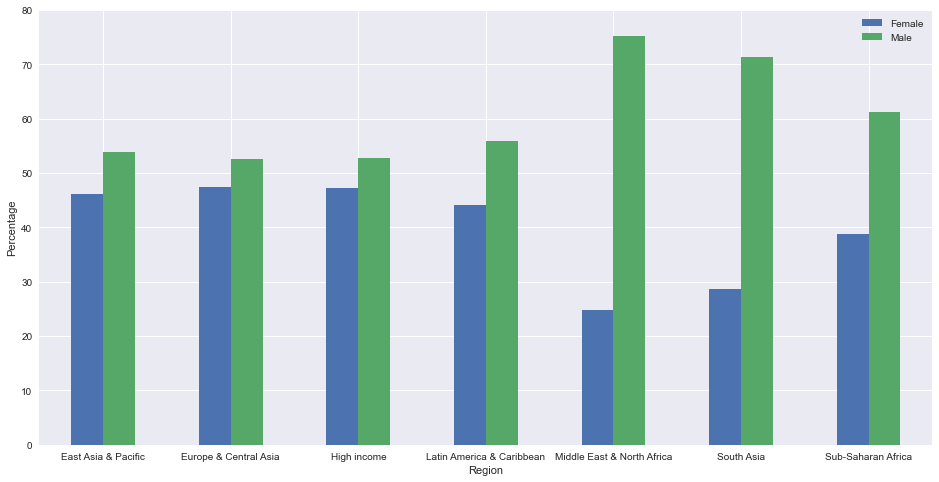

In [10]:
df_u= df_u[df_u["fin32"]=="Yes"]
counts = df_u.groupby(['regionwb', 'female']).size().reset_index(name='count')
total_counts = counts.groupby(['regionwb'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
pivot_table = counts.pivot(index=['regionwb'], columns='female', 
                           values='percentage')
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Region')
plt.ylabel('Percentage')
legend_labels = ['Female', 'Male']
ax.legend(legend_labels)
plt.ylim([0, 80])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation= 0)
plt.savefig('../../images/sta_gender.png', bbox_inches='tight')
# Display the plot
plt.show()

## Age

In [12]:
counts = df.groupby(['regionwb', 'fin34a', 'age']).size().reset_index(name='count')
total_counts = counts.groupby(['regionwb', 'fin34a'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
counts= counts[counts["fin34a"]== 1]
pivot_table = counts.pivot(index=['regionwb'], columns='age', 
                           values='percentage')

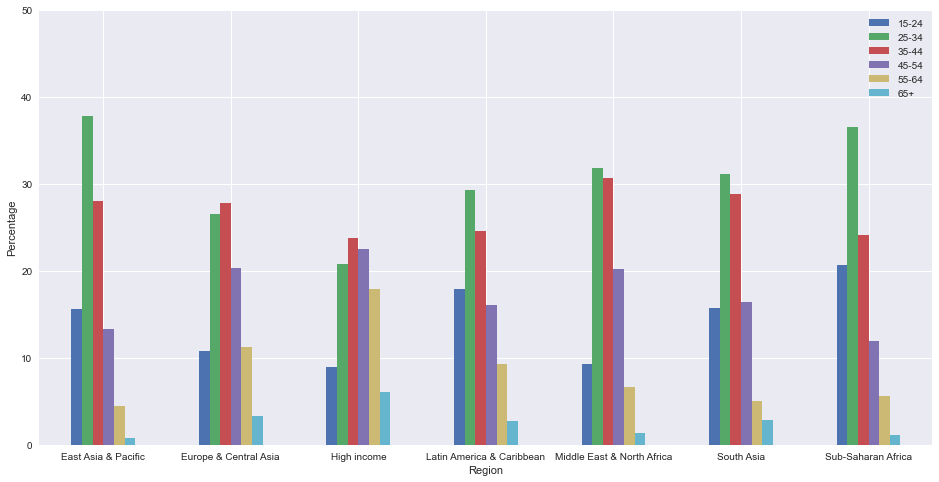

In [13]:
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Region')
plt.ylabel('Percentage')
legend_labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']
ax.legend(legend_labels)
plt.ylim([0, 50])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation= 0)
plt.savefig('../../images/stat_age.png', bbox_inches='tight')
# Display the plot
plt.show()

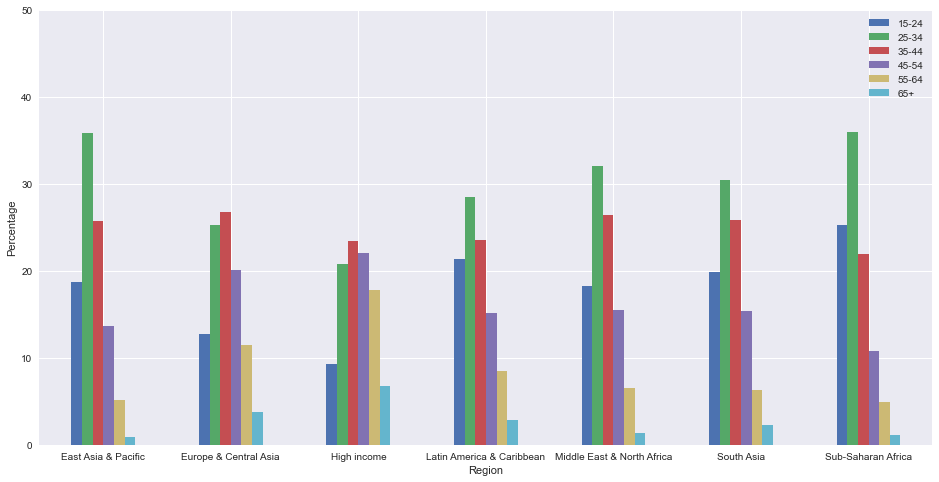

In [14]:
counts = df_u.groupby(['regionwb', 'age']).size().reset_index(name='count')
total_counts = counts.groupby(['regionwb'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
pivot_table = counts.pivot(index=['regionwb'], columns='age', 
                           values='percentage')
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Region')
plt.ylabel('Percentage')
legend_labels = ['15-24', '25-34', '35-44', '45-54', '55-64', '65+']
ax.legend(legend_labels)
plt.ylim([0, 50])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/sta_age.png', bbox_inches='tight')
# Display the plot
plt.show()

## Education Level

In [16]:
counts = df.groupby(['regionwb', 'fin34a', 'educ']).size().reset_index(name='count')
total_counts = counts.groupby(['regionwb', 'fin34a'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
counts= counts[counts["fin34a"]== 1]
pivot_table = counts.pivot(index=['regionwb'], columns='educ', 
                           values='percentage')

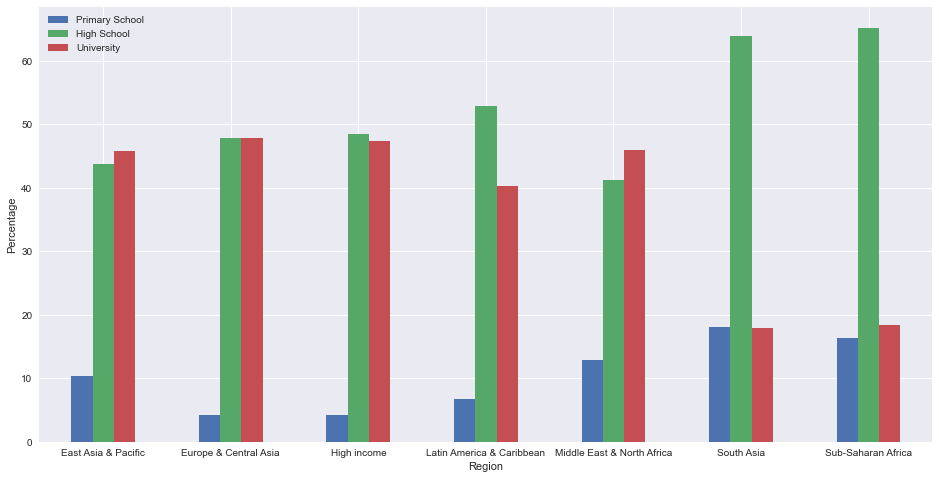

In [17]:
#colors = ['#800000', '#000080']
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Region')
plt.ylabel('Percentage')
legend_labels = ['Primary School', 'High School', 'University']
ax.legend(legend_labels)


# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation= 0)
plt.savefig('../../images/stat_educ.png', bbox_inches='tight')
# Display the plot
plt.show()

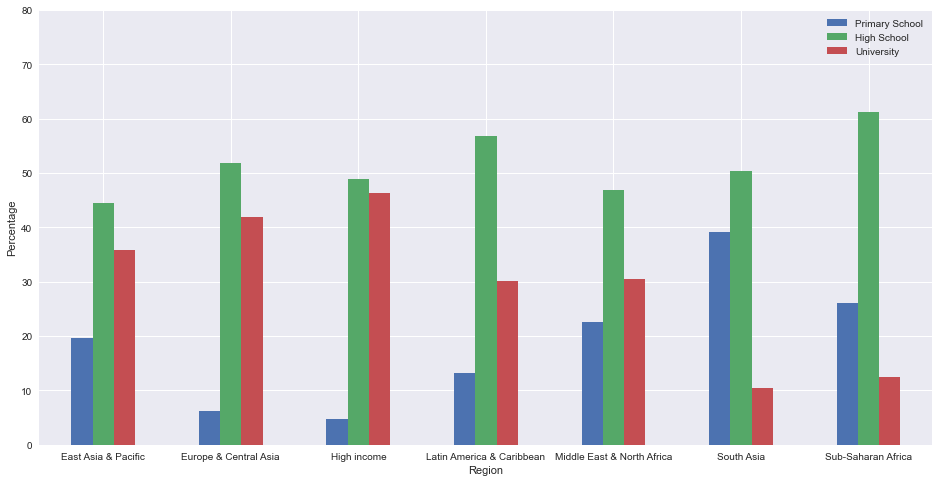

In [18]:
counts = df_u.groupby(['regionwb', 'educ']).size().reset_index(name='count')
total_counts = counts.groupby(['regionwb'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
pivot_table = counts.pivot(index=['regionwb'], columns='educ', 
                           values='percentage')
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Region')
plt.ylabel('Percentage')
legend_labels = ['Primary School', 'High School', 'University']
ax.legend(legend_labels)
plt.ylim([0, 80])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/sta_educ.png', bbox_inches='tight')
# Display the plot
plt.show()

# Income Level

In [19]:
counts = df.groupby(['regionwb', 'fin34a', 'inc_q']).size().reset_index(name='count')
total_counts = counts.groupby(['regionwb', 'fin34a'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
counts= counts[counts["fin34a"]== 1]
pivot_table = counts.pivot(index=['regionwb'], columns='inc_q', 
                           values='percentage')

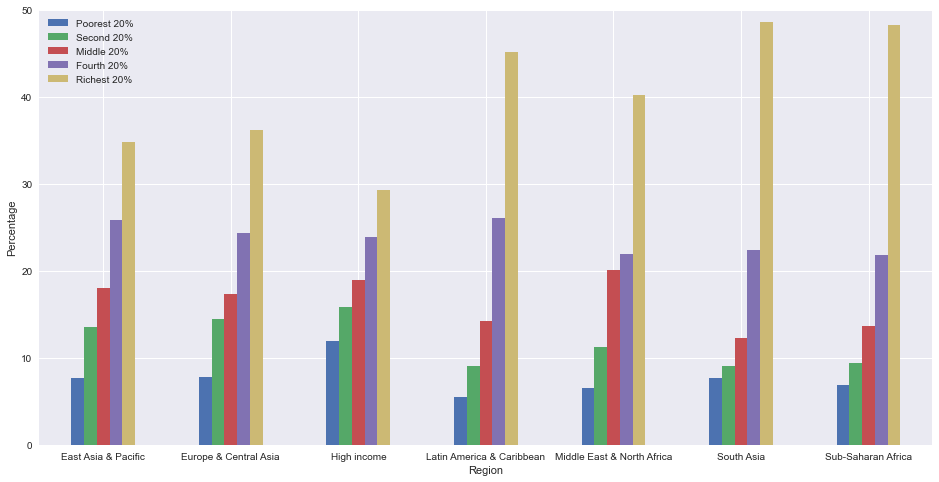

In [20]:
#colors = ['#800000', '#000080']
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Region')
plt.ylabel('Percentage')
legend_labels = ['Poorest 20%', 'Second 20%', 'Middle 20%', 'Fourth 20%', 'Richest 20%']
ax.legend(legend_labels)
plt.ylim([0, 50])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/stat_inc.png', bbox_inches='tight')
# Display the plot
plt.show()

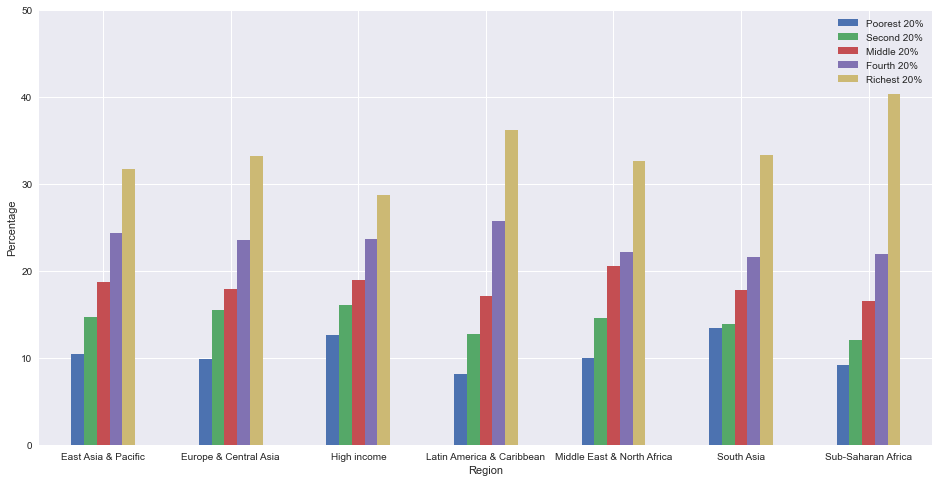

In [21]:
counts = df_u.groupby(['regionwb', 'inc_q']).size().reset_index(name='count')
total_counts = counts.groupby(['regionwb'])['count'].transform('sum')
counts['percentage'] = (counts['count'] / total_counts) * 100
pivot_table = counts.pivot(index=['regionwb'], columns='inc_q', 
                           values='percentage')
fig, ax = plt.subplots(figsize=(16, 8))
pivot_table.plot(kind='bar', stacked=False, ax= ax)#color= colors, ax=ax)

# Set the plot title and axis labels
plt.xlabel('Region')
plt.ylabel('Percentage')
legend_labels = ['Poorest 20%', 'Second 20%', 'Middle 20%', 'Fourth 20%', 'Richest 20%']
ax.legend(legend_labels)
plt.ylim([0, 50])

# Rotate the x-axis labels for better readability if needed
plt.xticks(rotation=0)
plt.savefig('../../images/sta_inc.png', bbox_inches='tight')
# Display the plot
plt.show()

## MCA

In [17]:
import pandas as pd

data = {
    "countries": ["Algeria", "Brazil", "Cameroon", "India", "Japan", "Kenya", "Norway", "South Africa"],
    "accuracy": [93.53, 94.03, 91., 97.33, 92.08, 95., 97.01, 96.55]
}

df = pd.DataFrame(data)

print(df)


      countries  accuracy
0       Algeria     93.53
1        Brazil     94.03
2      Cameroon     91.00
3         India     97.33
4         Japan     92.08
5         Kenya     95.00
6        Norway     97.01
7  South Africa     96.55


In [23]:
list(df["countries"])

['Algeria',
 'Brazil',
 'Cameroon',
 'India',
 'Japan',
 'Kenya',
 'Norway',
 'South Africa']

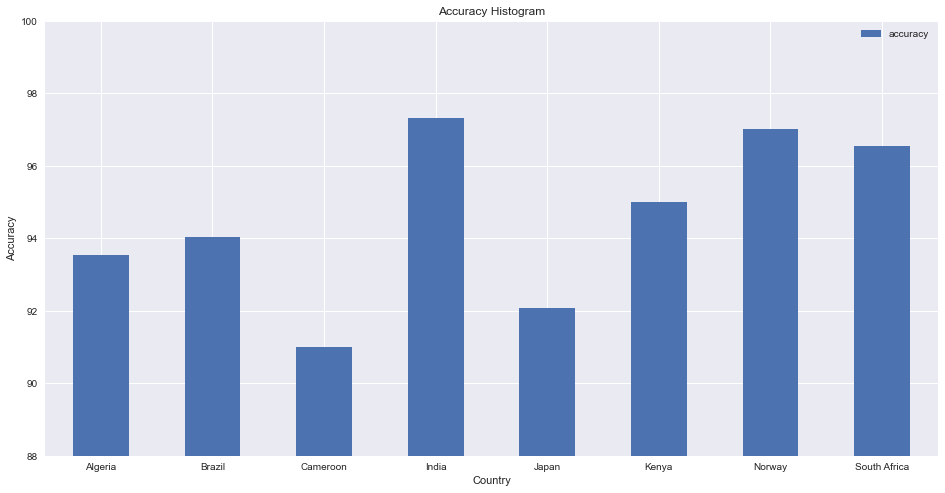

In [28]:
fig, ax = plt.subplots(figsize=(16, 8))
df.plot(kind='bar', stacked=False, ax=ax)
plt.xlabel("Country")
plt.ylabel("Accuracy")
plt.title("Prediction Accuracy")
plt.xticks(list(range(8)), list(df["countries"]), rotation=0)
plt.ylim([88, 100])
# Show the plot
plt.show()